## <font color = 'purple'>Notebook 8: Latent Semantic Indexing (LSI)</font>
<font color = 'purple'>Notebook 8: Latent Semantic Indexing (LSI) is a technique used in natural language processing to uncover the underlying relationships between words in a set of documents by reducing the dimensionality of the term-document matrix. It uses singular value decomposition (SVD) to capture the most important concepts or topics, allowing for more effective information retrieval and analysis.</font>


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving main_dataset.xlsx to main_dataset (2).xlsx


In [ ]:
# Libraries for data processing
import numpy as np
import pandas as pd

# Libraries for text processing and NLP
import nltk
from textblob import TextBlob

# Gensim library for topic modelling and text vectorisation
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# Libraries for data visualisation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt

# Miscellaneous imports
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('main_dataset.xlsx')

print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)

df.head()

Shape of the dataset: (44855, 4)
Columns in the dataset: Index(['date', 'review', 'rating', 'userName'], dtype='object')


,date,review,rating,userName
0,2021-05-06 05:15:00.000,This feature has been one of the most annoying...,5,Keanu De Sousa
1,2024-02-01 09:06:59.904,"The privacy on WhatsApp is incredible, I know ...",4,The great idea!!!
2,2023-08-14 05:42:00.000,"Hi WhatsApp,\nThis app is really great, I use ...",4,Pokey Ball ‚öæÔ∏è
3,2024-08-04 15:53:00.384,If there was ever an equivalent of social serv...,1,Zenicero
4,2024-05-26 01:12:59.616,Im on holiday and reliant on whatsapp to commu...,1,JohnDoe63737286


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if you haven't already
nltk.download('stopwords')

# Set of stopwords in English
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""

    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Split text into words and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    # Join the filtered words back into a single string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

# Apply the updated preprocess_text function to your dataset
df['content_cleaned'] = df['review'].apply(preprocess_text)

# Display the first few rows of the cleaned content
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,date,review,rating,userName,content_cleaned
0,2021-05-06 05:15:00.000,This feature has been one of the most annoying...,5,Keanu De Sousa,feature one annoying aspects whatsapp everytim...
1,2024-02-01 09:06:59.904,"The privacy on WhatsApp is incredible, I know ...",4,The great idea!!!,privacy whatsapp incredible know probably donä...
2,2023-08-14 05:42:00.000,"Hi WhatsApp,\nThis app is really great, I use ...",4,Pokey Ball ‚öæÔ∏è,hi whatsapp app really great use everyday exac...
3,2024-08-04 15:53:00.384,If there was ever an equivalent of social serv...,1,Zenicero,ever equivalent social services took words awa...
4,2024-05-26 01:12:59.616,Im on holiday and reliant on whatsapp to commu...,1,JohnDoe63737286,im holiday reliant whatsapp communicate agents...


In [ ]:
df.isnull()
total_null_values = df.isnull().sum().sum()
print("Total null values in the DataFrame: ", total_null_values)
df.fillna('', inplace = True)
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df = df[['content_cleaned', 'review', 'rating', 'date']]
df.head()

Total null values in the DataFrame:  12


,content_cleaned,review,rating,date
0,feature one annoying aspects whatsapp everytim...,This feature has been one of the most annoying...,5,2021-05-06 05:15:00.000
1,privacy whatsapp incredible know probably donä...,"The privacy on WhatsApp is incredible, I know ...",4,2024-02-01 09:06:59.904
2,hi whatsapp app really great use everyday exac...,"Hi WhatsApp,\nThis app is really great, I use ...",4,2023-08-14 05:42:00.000
3,ever equivalent social services took words awa...,If there was ever an equivalent of social serv...,1,2024-08-04 15:53:00.384
4,im holiday reliant whatsapp communicate agents...,Im on holiday and reliant on whatsapp to commu...,1,2024-05-26 01:12:59.616


In [ ]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['content_cleaned'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else
                                             ('negative' if x <- 0.1 else 'neutral'))

In [ ]:
df[['content_cleaned', 'rating', 'sentiment_label']]

,content_cleaned,rating,sentiment_label
0,feature one annoying aspects whatsapp everytim...,5,negative
1,privacy whatsapp incredible know probably donä...,4,positive
2,hi whatsapp app really great use everyday exac...,4,positive
3,ever equivalent social services took words awa...,1,positive
4,im holiday reliant whatsapp communicate agents...,1,negative
...,...,...,...
44850,free delivery prime,5,positive
44851,would expectamazon trying get hand pocket,3,neutral
44852,registry system mess sorting price low high wa...,2,neutral
44853,clothes furniture options kinda meh overall de...,3,neutral


In [ ]:
# Import necessary libraries
from gensim.models import LsiModel
from gensim import corpora

In [ ]:
# Tokenize the cleaned text into words for LDA
df['tokens'] = df['content_cleaned'].apply(gensim.utils.simple_preprocess)

# Create a dictionary and a corpus for LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Print a sample of the dictionary and corpus
print(f"Sample of the dictionary: {list(dictionary.items())[:10]}")
print(f"Sample of the corpus: {corpus[:1]}")

Sample of the dictionary: [(0, 'always'), (1, 'annoying'), (2, 'aspects'), (3, 'data'), (4, 'default'), (5, 'device'), (6, 'download'), (7, 'everytime'), (8, 'feature'), (9, 'features')]
Sample of the corpus: [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 3)]]


In [ ]:
df['content_tokenized'] = df['content_cleaned'].apply(lambda x: simple_preprocess(x, deacc=True))

processed_texts = df['content_tokenized'].tolist()

dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

In [ ]:
num_topics = 5

# Create the LSA model
lsi_model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)

for idx, topic in lsi_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

doc = processed_texts[0]
bow = dictionary.doc2bow(doc)
doc_lsi = lsi_model[bow]
print(f"Topic distribution for the first document: {doc_lsi}")

Topic 0: 0.834*"app" + 0.135*"good" + 0.124*"like" + 0.121*"love" + 0.120*"itaos" + 0.109*"songs" + 0.109*"use" + 0.108*"music" + 0.102*"great" + 0.083*"song"
Topic 1: -0.486*"app" + 0.323*"songs" + 0.280*"like" + 0.266*"song" + 0.221*"itaos" + 0.178*"music" + 0.165*"playlist" + 0.160*"listen" + 0.152*"instagram" + 0.135*"want"
Topic 2: 0.517*"instagram" + -0.312*"songs" + 0.277*"account" + -0.262*"song" + -0.259*"music" + -0.193*"good" + -0.187*"listen" + -0.146*"playlist" + -0.139*"play" + 0.135*"please"
Topic 3: 0.847*"good" + -0.285*"songs" + 0.273*"itaos" + -0.145*"song" + 0.132*"music" + -0.125*"playlist" + -0.123*"app" + -0.086*"play" + 0.056*"really" + 0.047*"great"
Topic 4: -0.531*"love" + 0.333*"song" + -0.269*"like" + -0.244*"would" + -0.214*"songs" + -0.198*"great" + 0.185*"account" + 0.166*"time" + 0.151*"every" + 0.136*"iaove"
Topic distribution for the first document: [(0, 0.39583936822047755), (1, 0.5329729650814397), (2, 0.6193350969130134), (3, 0.0778808031463755), (4

In [ ]:
#pip install pyldavis

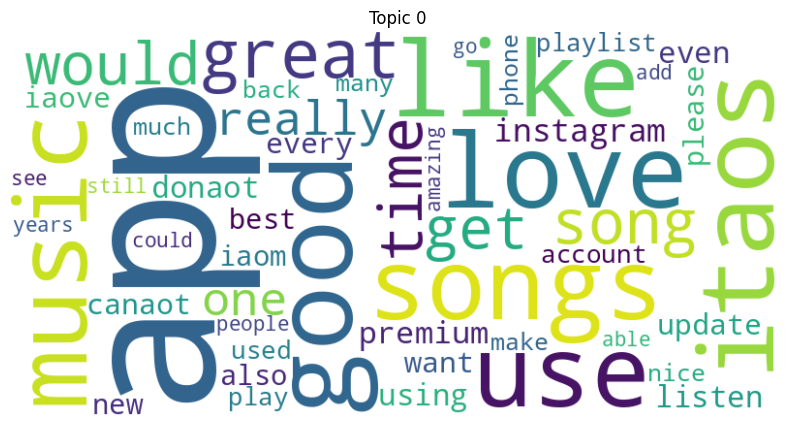

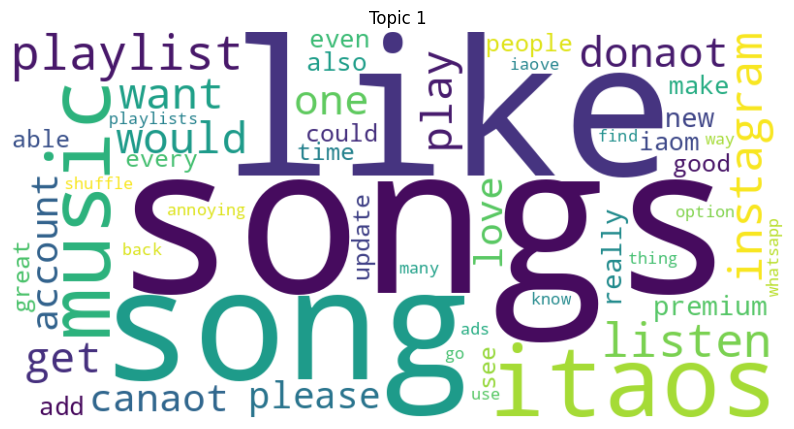

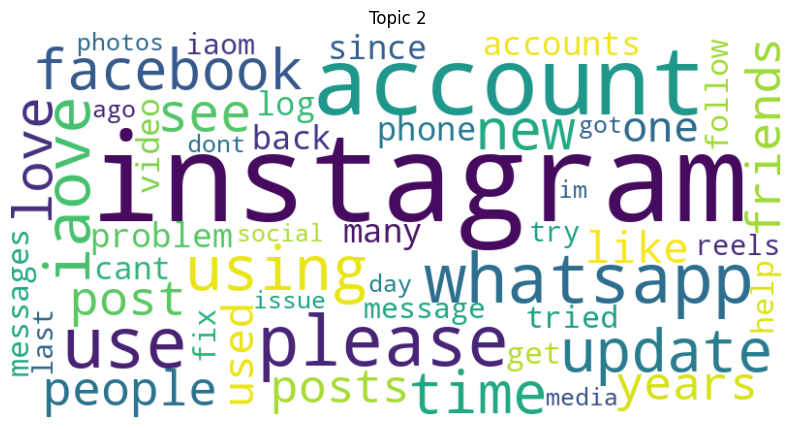

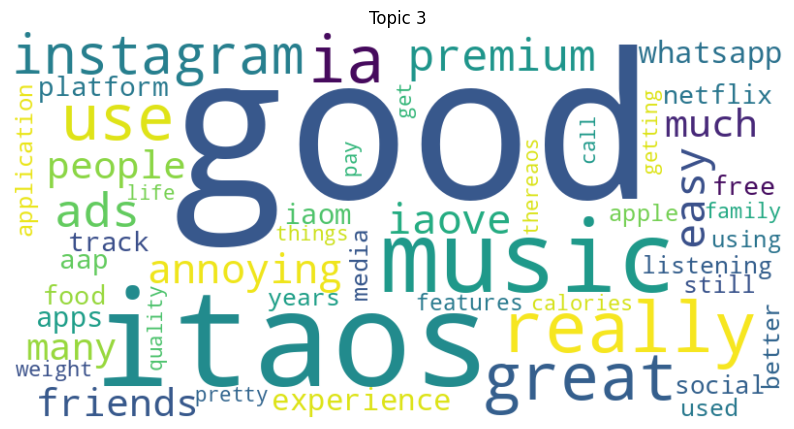

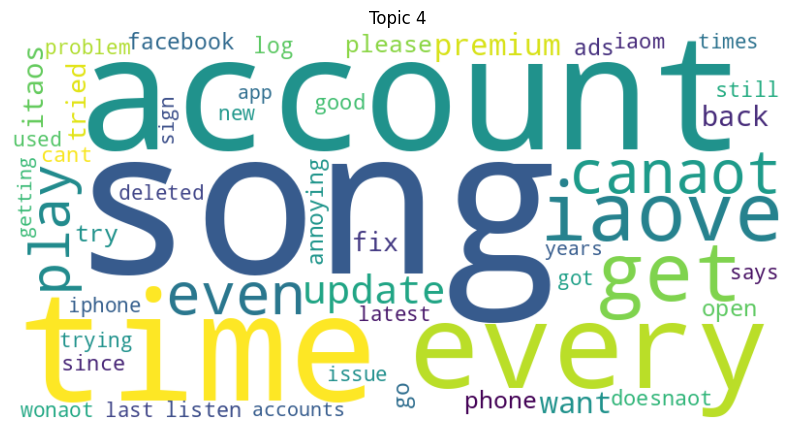

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of terms from the original corpus
id2word = {id: word for word, id in dictionary.token2id.items()}

# Generate word clouds for each topic
for idx in range(lsi_model.num_topics):
    # Get the terms and their weights for the topic
    terms = lsi_model.projection.u[:, idx]  # Get the topic vector for the idx topic

    # Create a dictionary of terms and their weights
    terms_dict = {id2word[i]: terms[i] for i in range(len(terms)) if terms[i] > 0}

    # Get the top 50 terms based on weights
    terms_dict = dict(sorted(terms_dict.items(), key=lambda x: -x[1])[:50])

    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(terms_dict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {idx}')
    plt.show()

In [ ]:
from gensim.models import CoherenceModel

# Create a Coherence Model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')

# Get the coherence score
coherence_score_lsi = coherence_model_lsi.get_coherence()
print("Coherence Score:", coherence_score_lsi)

Coherence Score: 0.6595272912619435


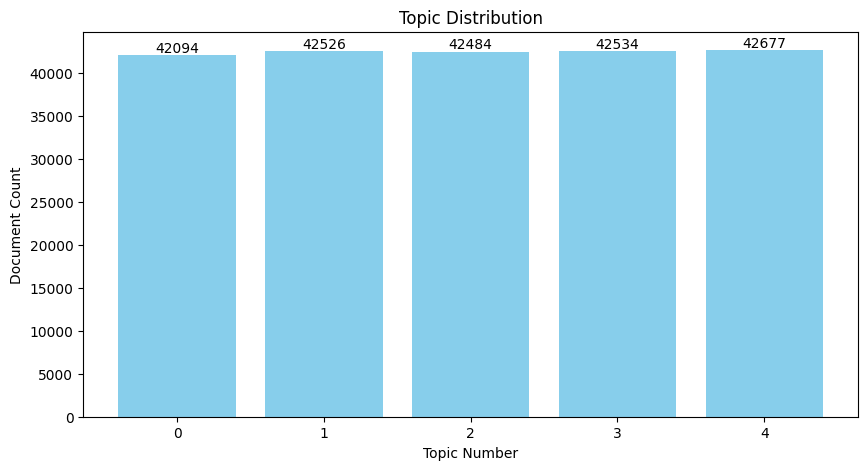

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume topic_counts contains the counts of documents per topic
topic_counts = [0] * lsi_model.num_topics

for doc in corpus:
    topics = lsi_model[doc]
    for topic in topics:
        topic_counts[topic[0]] += 1

# Create a histogram for topic distribution
plt.figure(figsize=(10, 5))
bars = plt.bar(range(lsi_model.num_topics), topic_counts, color='skyblue')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Topic Number')
plt.ylabel('Document Count')
plt.title('Topic Distribution')
plt.xticks(range(lsi_model.num_topics))  # Set x-ticks to show all topics
plt.show()

## <font color = 'purple'>Hyperparameter Tuning</font>


In [ ]:
import numpy as np
import pandas as pd
from gensim import models, corpora
from sklearn.model_selection import ParameterGrid

def evaluate_lsi_model(num_topics):
    # Create the LSI model
    lsi_model = models.LsiModel(corpus, num_topics=num_topics, id2word=dictionary)

    return num_topics


param_grid = {'num_topics': [5, 10, 15, 20, 25, 30]}


results = []
for params in ParameterGrid(param_grid):
    num_topics = params['num_topics']
    score = evaluate_lsi_model(num_topics)
    results.append((num_topics, score))

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results, columns=['Num Topics', 'Score'])

# Find the best parameter
best_params = results_df.loc[results_df['Score'].idxmax()]

print("Best Number of Topics:", best_params['Num Topics'])
print("Best Score:", best_params['Score'])

Best Number of Topics: 30
Best Score: 30
